<a href="https://colab.research.google.com/github/rodraxphysics/Master_VIU_Data_Science/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico Visualizacion de Datos
**Estudiante:** Rodrigo Eduardo Sandoval Brito

In [ ]:
# Imports generales
import pandas as pd
import io
from google.colab import files
import numpy as np
import time

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)

    return df

def download_predictions(test, pred_total_cases):
  file_name = "practica2_pred_" + time.strftime("%Y") + time.strftime("%m") + time.strftime("%d") + time.strftime("%H") + time.strftime("%M") + time.strftime("%S") + ".csv"
  predictions = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': pred_total_cases})
  with open(file_name, 'w') as f:
    predictions.to_csv(f, index = False)
  files.download(file_name)
  print("Downloaded " + file_name)

In [ ]:
df = upload_files()

In [ ]:
df.head()

,material_id,formula_pretty,band_gap,nsites,nelements,volume,density,density_atomic,crystal_symmetry,symmetry_number,...,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,equilibrium_reaction_energy_per_atom,efermi,is_magnetic,total_magnetization,num_magnetic_sites,atomic_number
0,mp-1,Cs,0.0000,1,1,122.476825,1.801930,122.476825,Cubic,229,...,-0.856633,0.038770,0.038770,False,NaN,0.737911,False,0.000025,0,55
1,mp-2,Pd,0.0000,1,1,15.027995,11.759025,15.027995,Cubic,225,...,-5.179882,0.000000,0.000000,True,0.0,4.479596,True,0.385173,1,46
2,mp-3,Cs,0.0000,2,1,250.347216,1.763109,125.173608,Tetragonal,141,...,-0.807414,0.087989,0.087989,False,NaN,0.476157,False,0.000002,0,55
3,mp-4,Nd,0.0000,1,1,35.760978,6.697789,35.760978,Cubic,229,...,-4.628184,0.139964,0.139964,False,NaN,3.434081,True,0.611908,1,60
4,mp-7,S,2.2079,6,1,152.798895,2.090795,25.466483,Trigonal,148,...,-4.071949,0.064501,0.064501,False,NaN,0.588461,False,0.000000,0,16


In [ ]:
df.shape

(19952, 23)

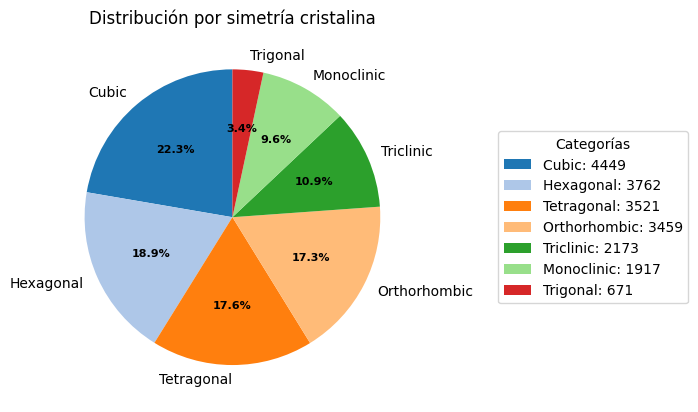

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Vamos a crear un DataFrame de ejemplo para el propósito de esta visualización
symmetry_counts_array = df['crystal_symmetry'].value_counts().values
data = {
    'crystal_symmetry': ['Cubic', 'Hexagonal', 'Tetragonal', 'Orthorhombic', 'Triclinic', 'Monoclinic', 'Trigonal'],
    'count': symmetry_counts_array
}
df1 = pd.DataFrame(data)


# Contar las ocurrencias de cada categoría en 'crystal_symmetry'
category_counts = df1['count']

# Nombres de las categorías
categories = df1['crystal_symmetry']

# Porcentajes para cada categoría
total = sum(category_counts)
percentages = [(count / total) * 100 for count in category_counts]

# Creamos la figura y el eje
fig, ax = plt.subplots()

# Creamos el gráfico de pastel
wedges, texts, autotexts = ax.pie(
    percentages,
    labels=categories,
    autopct='%1.1f%%',  # Muestra el porcentaje con un decimal
    startangle=90,  # Comienza desde la parte superior
    colors=plt.cm.tab20.colors  # Colores del gráfico
)

# Añadimos una leyenda con los valores netos
ax.legend(wedges, [f"{cat}: {val}" for cat, val in zip(categories, category_counts)],
          title="Categorías",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# Establecemos el título
plt.title('Distribución por simetría cristalina')

plt.savefig('distribucion_simetria_cristalina.svg', format='svg', bbox_inches='tight')



# Mostrar el gráfico
plt.show()

In [ ]:
data=df

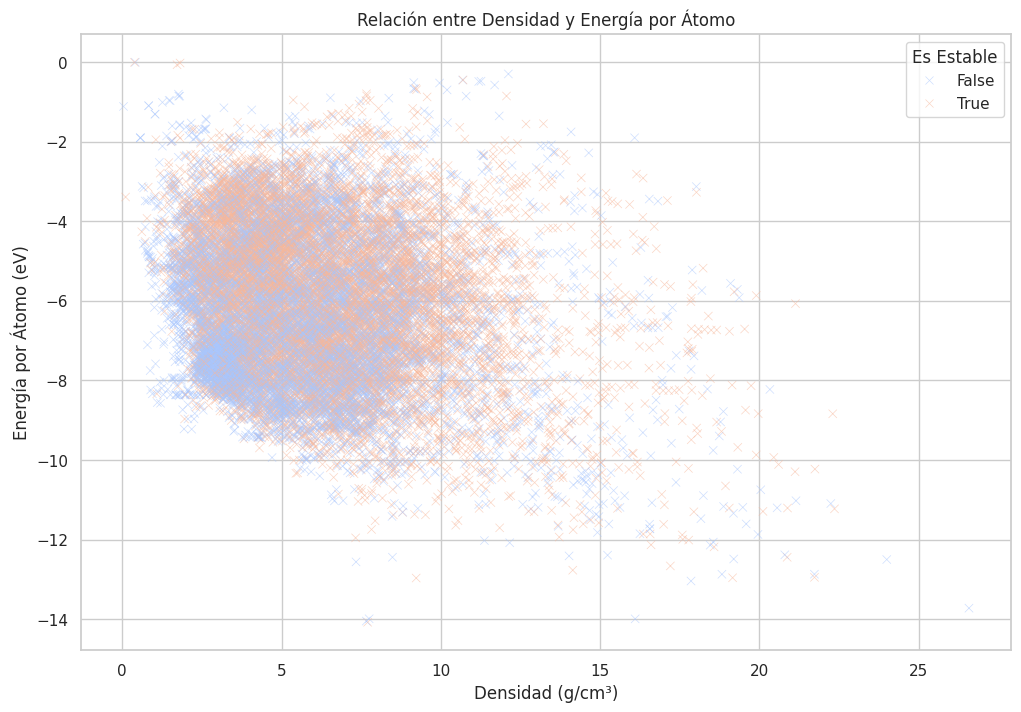

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 2. Scatter Plot of Density vs Energy per Atom, differentiating between stable and unstable materials
plt.figure(figsize=(12, 8))
# Utiliza el argumento 'style' con la opción 'markers' para especificar 'x' para falsos y '+' para verdaderos.
sns.scatterplot(x='density', y='energy_per_atom', hue='is_stable', data=data,
                palette='coolwarm', alpha=0.6, style='is_stable', markers=['x', 'x'])
plt.title('Relación entre Densidad y Energía por Átomo')
plt.xlabel('Densidad (g/cm³)')
plt.ylabel('Energía por Átomo (eV)')
plt.legend(title='Es Estable')

plt.savefig('relacion_densidad_energia.svg', format='svg', bbox_inches='tight', dpi=300)


plt.show()


In [ ]:
import cairosvg

# Convert SVG to PDF with adjustable DPI
svg_file = 'relacion_densidad_energia.svg'
pdf_file = 'relacion_densidad_energia.pdf'
dpi = 300  # Adjust DPI as needed

# Convert SVG to PDF with specified DPI
cairosvg.svg2pdf(url=svg_file, write_to=pdf_file, dpi=dpi)

print(f"Archivo PDF '{pdf_file}' creado con éxito.")

Archivo PDF 'relacion_densidad_energia.pdf' creado con éxito.


<ipython-input-8-a995c9f17fac>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('crystal_symmetry').mean()[['density', 'energy_per_atom', 'volume', 'band_gap']]
<ipython-input-8-a995c9f17fac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='crystal_symmetry', y='band_gap', data=sorted_band_gap, palette='viridis', order=sorted_band_gap['crystal_symmetry'])
<ipython-input-8-a995c9f17fac>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='crystal_symmetry', y='density',

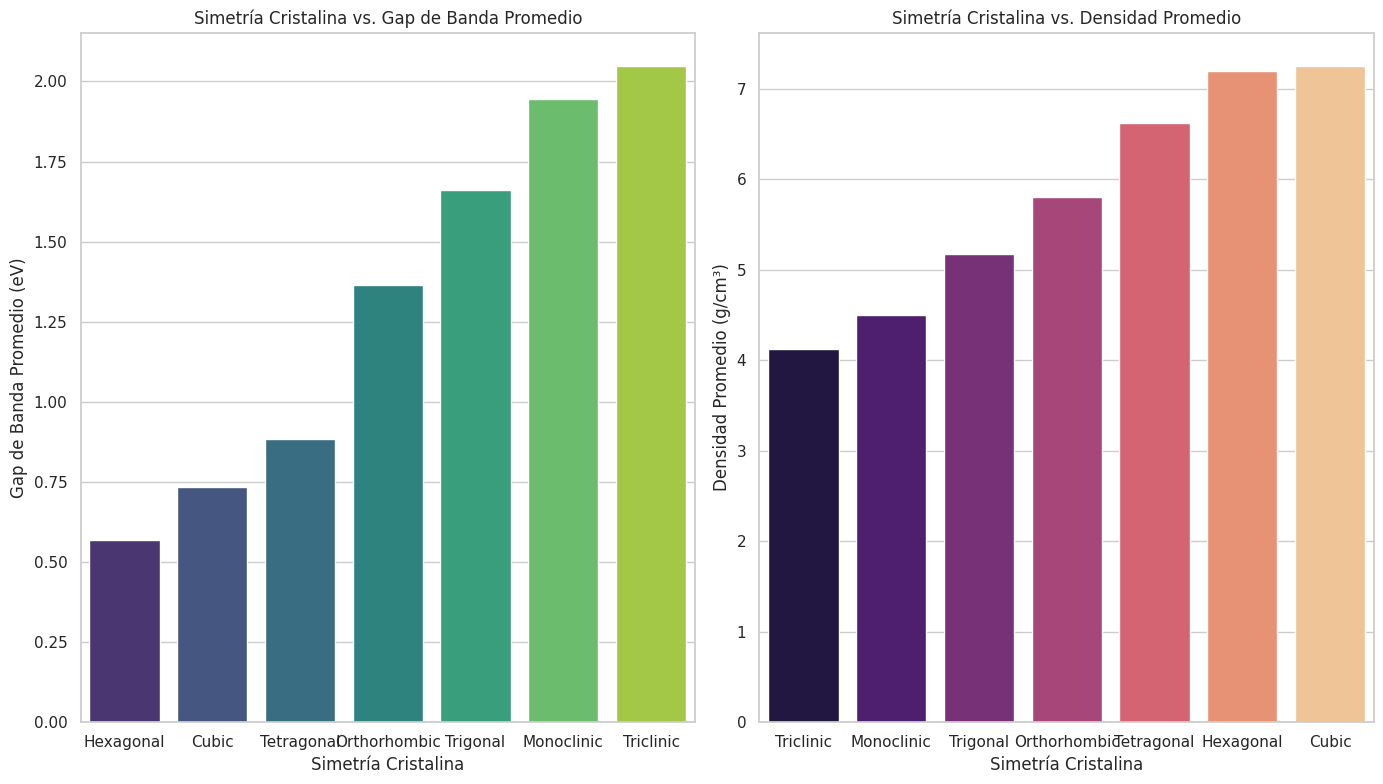

In [ ]:
# Replotting the data with vertical bars, sorted by the average values.
top_symmetries = data['crystal_symmetry'].value_counts().nlargest(5).index

# Filtering data to include only the selected symmetries
filtered_data = data[data['crystal_symmetry'].isin(top_symmetries)]

grouped_data = data.groupby('crystal_symmetry').mean()[['density', 'energy_per_atom', 'volume', 'band_gap']]
grouped_data.reset_index(inplace=True)
# Sorting the grouped data by 'band_gap' and 'density' in ascending order for vertical bar plots
sorted_band_gap = grouped_data.sort_values(by='band_gap', ascending=True)
sorted_density = grouped_data.sort_values(by='density', ascending=True)


# Plotting the sorted data with vertical bars
plt.figure(figsize=(14, 8))

# Plotting average band gap for each symmetry, sorted by band gap
plt.subplot(1, 2, 1)
sns.barplot(x='crystal_symmetry', y='band_gap', data=sorted_band_gap, palette='viridis', order=sorted_band_gap['crystal_symmetry'])
plt.title('Simetría Cristalina vs. Gap de Banda Promedio')
plt.xlabel('Simetría Cristalina')
plt.ylabel('Gap de Banda Promedio (eV)')

# Plotting average density for each symmetry, sorted by density
plt.subplot(1, 2, 2)
sns.barplot(x='crystal_symmetry', y='density', data=sorted_density, palette='magma', order=sorted_density['crystal_symmetry'])
plt.title('Simetría Cristalina vs. Densidad Promedio')
plt.xlabel('Simetría Cristalina')
plt.ylabel('Densidad Promedio (g/cm³)')

plt.tight_layout()

plt.savefig('simetria_bandgap_densidad.svg', format='svg', bbox_inches='tight')

plt.show()


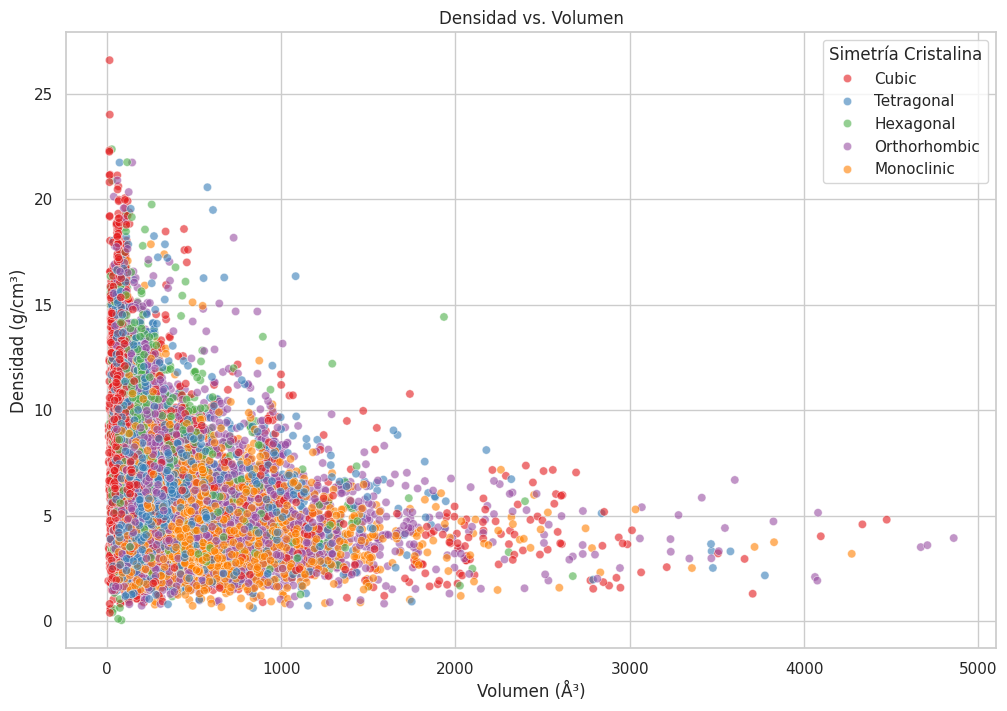

In [ ]:
 # 3. Scatter Plot of Density vs Volume, differentiating by crystal symmetry
# Filtering to the top crystal symmetries again for clarity
plt.figure(figsize=(12, 8))
sns.scatterplot(x='volume', y='density', hue='crystal_symmetry', data=filtered_data, palette='Set1', alpha=0.6)
plt.title('Densidad vs. Volumen')
plt.xlabel('Volumen (Å³)')
plt.ylabel('Densidad (g/cm³)')
plt.legend(title='Simetría Cristalina')

plt.savefig('densidad_vs_volumen.svg', format='svg', bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import cairosvg

# Convert SVG to PDF with adjustable DPI
svg_file = 'densidad_vs_volumen.svg'
pdf_file = 'densidad_vs_volumen.pdf'
dpi = 300  # Adjust DPI as needed

# Convert SVG to PDF with specified DPI
cairosvg.svg2pdf(url=svg_file, write_to=pdf_file, dpi=dpi)

print(f"Archivo PDF '{pdf_file}' creado con éxito.")



Archivo PDF 'densidad_vs_volumen.pdf' creado con éxito.


<ipython-input-10-05a252e09058>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('crystal_symmetry').mean()[['density', 'energy_per_atom', 'volume', 'band_gap']]


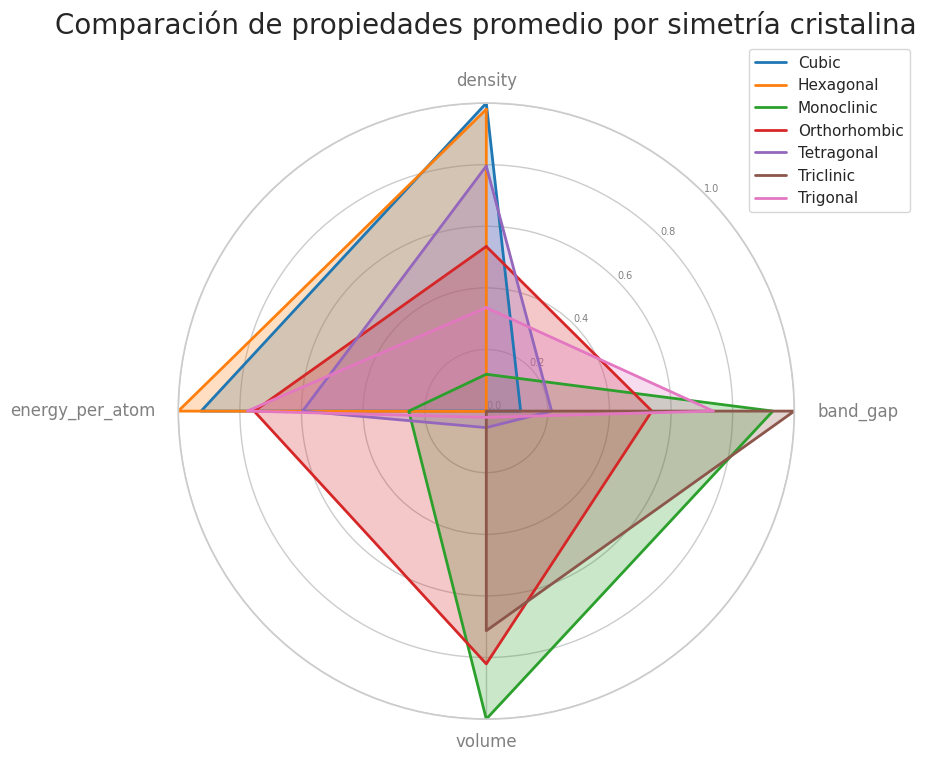

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Suponiendo que la variable 'df' ya contiene los datos y está definida anteriormente
data = df

# Agrupar los datos por 'crystal_symmetry' y calcular el promedio
grouped_data = data.groupby('crystal_symmetry').mean()[['density', 'energy_per_atom', 'volume', 'band_gap']]
grouped_data.reset_index(inplace=True)

# Establecer el orden de las etiquetas para que coincidan con el gráfico deseado
attribute_labels = ['density', 'band_gap', 'volume', 'energy_per_atom']
values = grouped_data[attribute_labels].values

# Normalizar los datos para el gráfico radar
min_max_range = {attribute: (grouped_data[attribute].min(), grouped_data[attribute].max()) for attribute in attribute_labels}
values_normalized = np.array([[(value - min_max_range[attribute][0]) / (min_max_range[attribute][1] - min_max_range[attribute][0])
                               for attribute, value in zip(attribute_labels, value_list)] for value_list in values])

# Marcadores para el gráfico
plot_markers = np.linspace(0, 1, 6)
plot_str_markers = [str(round(marker, 2)) for marker in plot_markers]

# Función ajustada para graficar múltiples categorías en el mismo gráfico radar
def make_combined_radar_chart(categories, data, attribute_labels, plot_markers, plot_str_markers, colors):
    labels = np.array(attribute_labels)
    num_vars = len(labels)

    # Calcula los ángulos de cada eje en el gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Completar el círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Dibujar los ejes y añadir etiquetas
    ax.set_theta_offset(pi / 2)  # Rotar el gráfico
    ax.set_theta_direction(-1)  # Cambiar la dirección de los ángulos

    plt.xticks(angles[:-1], labels, color='grey', size=12)

    # Ajustar la posición de las etiquetas de los ejes para 'band_gap' y 'energy_per_atom'
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle == angles[1]:  # 'band_gap' está en el segundo lugar en la lista 'angles'
            label.set_horizontalalignment('left')
        elif angle == angles[3]:  # 'energy_per_atom' está en el cuarto lugar en la lista 'angles'
            label.set_horizontalalignment('right')

    # Dibujar las etiquetas de los valores de 'y'
    ax.set_rlabel_position(180 / num_vars)  # Ajustar la posición de las etiquetas de 'y' para mejorar la visualización
    plt.yticks(plot_markers, plot_str_markers, color="grey", size=7)
    plt.ylim(0, 1)

    # Graficar los datos y rellenar con color
    for idx, (category, stats) in enumerate(zip(categories, data)):
        stats = np.concatenate((stats, [stats[0]]))  # Cerrar el bucle
        ax.plot(angles, stats, color=colors[idx], linewidth=2, label=category)
        ax.fill(angles, stats, color=colors[idx], alpha=0.25)

    # Añadir leyenda con posición ajustada
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

    plt.title('Comparación de propiedades promedio por simetría cristalina', size=20, y=1.1)

    return plt

# Colores seleccionados manualmente para un mayor contraste
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Crear el gráfico radar con todos los grupos de simetría
combined_radar_plot = make_combined_radar_chart(grouped_data['crystal_symmetry'], values_normalized, attribute_labels, plot_markers, plot_str_markers, colors)


plt.savefig('propiedades_vs_simetria.svg', format='svg', bbox_inches='tight')

combined_radar_plot.show()
